# Question 1

In [6]:
import pandas as pd
import numpy as np

# Load User Data and Explore

users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()
print(users.describe)

# Calculate Average Age by Occupation

occupation_avg_age = users.groupby('occupation')['age'].mean()
print("Average Age per Occupation is as follows:")
print(occupation_avg_age)
print()

# Calculate Male Ratio by Occupation

occupation_gender_count = users.groupby('occupation').gender.count()
users['male_flag'] = np.where(users.gender == 'M', 1, 0)
male_ratio_occupation = (users.groupby('occupation').male_flag.sum() / occupation_gender_count).round(2).sort_values(ascending=False)
print("Male Ratio per Occupation is as follows:")
print(male_ratio_occupation)
print()

# Calculate Minimum and Maximum Age by Occupation

occupation_min_age = users.groupby('occupation')['age'].min()
print("Minimum Age per Occupation is as follows:")
#print(occupation_min_age)
print()

occupation_max_age = users.groupby('occupation')['age'].max()
print("Maximum Age per Occupation is as follows:")
print(occupation_max_age)
print()

# Calculate Average Age by Gender and Occupation

avg_age_by_gender_occupation = pd.pivot_table(users, 'age', 'occupation', 'gender')
print("Average Age per Gender per Occupation is as follows:")
print(avg_age_by_gender_occupation)
print()

# Calculate Male and Female Percentages by Occupation

occupation_gender_count = users.groupby('occupation').gender.count()
users['male_flag'] = np.where(users.gender == 'M', 1, 0)
users['female_flag'] = np.where(users.gender == 'F', 1, 0)
male_percent_by_occupation = ((users.groupby('occupation').male_flag.sum() / occupation_gender_count) * 100).round(2)
female_percent_by_occupation = ((users.groupby('occupation').female_flag.sum() / occupation_gender_count) * 100).round(2)
print("Male Percentage per Occupation is as follows:")
print(male_percent_by_occupation)
print("Female Percentage per Occupation is as follows:")
print(female_percent_by_occupation)
print()


<bound method NDFrame.describe of      user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>
Average Age per Occupation is as follows:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
mar

# Question 2

In [15]:
import pandas as pd
import numpy as np

# Step 1, 2, 3
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()
#print(euro12.describe)

# Step 4
goals = euro12.Goals

# Step 5
total_teams = euro12['Team'].count()
print("\nTeams participated in Euro 12:", total_teams, "\n")

# Step 6
num_columns = len(euro12.columns)
print("Number of columns in the DataSet:", num_columns, "\n")

# Step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("Discipline DataFrame:\n")
print(discipline, "\n")

# Step 8
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("Discipline DataFrame sorted:\n")
print(discipline_sorted, "\n")

# Step 9
mean_yellow_cards = discipline.groupby('Team')['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:\n")
print(mean_yellow_cards, "\n")

# Step 10
high_scoring_teams = euro12[euro12['Goals'] > 6]['Team']
print("Teams that scored more than 6 goals:\n")
print(high_scoring_teams, "\n")

# Step 11
teams_starting_with_G = euro12[euro12['Team'].str.match('G')]['Team']
print("Teams that start with 'G':\n")
print(teams_starting_with_G, "\n")

# Step 12
first_seven_columns = euro12.iloc[:, 0:7]
print("First 7 columns:\n")
print(first_seven_columns, "\n")

# Step 13
columns_except_last_three = euro12.iloc[:, 0:-3]
print("Columns except the last 3:\n")
print(columns_except_last_three, "\n")

# Step 14
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(selected_teams)][['Team', 'Shooting Accuracy']]
print("Shooting Accuracy for selected teams:\n")
print(shooting_accuracy_selected_teams, "\n")


Teams participated in Euro 12: 16 

Number of columns in the DataSet: 35 

Discipline DataFrame:

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0 

Discipline DataFrame sorted:

                   Team  Yellow Card

# Question 3

In [45]:
import pandas as pd
import numpy as np
import random

# Step 2
list_a = [[random.randint(1, 4)] for x in range(100)]
list_b = [[random.randint(1, 3)] for x in range(100)]
list_c = [[random.randint(10000, 30000)] for x in range(100)]

series_a = pd.Series(list_a)
series_b = pd.Series(list_b)
series_c = pd.Series(list_c)

# Step 3
data = {'bedroom_count': series_a, 'bathroom_count': series_b, 'price_per_square_meter': series_c}
df = pd.DataFrame(data)

# Step 4
df.columns = ['bedroom_count', 'bathroom_count', 'price_per_square_meter']

# Step 5
big_column = pd.DataFrame(pd.concat([series_a, series_b, series_c], axis=0))
big_column.columns = ['big_column']

# Step 6 & Step 7
big_column.reset_index(drop=True, inplace=True)
big_column = big_column.reindex(index=range(0, 300))

# Recheck index range
print("Now 'big_column' goes up to index:", big_column.index.max())

# Display the final DataFrames
print("\nFinal DataFrame:")
print(df)
print("\n'big_column' DataFrame:")
print(big_column)

Now 'big_column' goes up to index: 299

Final DataFrame:
   bedroom_count bathroom_count price_per_square_meter
0            [2]            [1]                [13240]
1            [3]            [1]                [23401]
2            [1]            [1]                [21666]
3            [4]            [1]                [14873]
4            [2]            [1]                [17901]
..           ...            ...                    ...
95           [1]            [2]                [29568]
96           [3]            [1]                [10966]
97           [3]            [2]                [14832]
98           [3]            [3]                [22155]
99           [2]            [2]                [13704]

[100 rows x 3 columns]

'big_column' DataFrame:
    big_column
0          [2]
1          [3]
2          [1]
3          [4]
4          [2]
..         ...
295    [29568]
296    [10966]
297    [14832]
298    [22155]
299    [13704]

[300 rows x 1 columns]


# Question 4

In [25]:
import pandas as pd
import numpy as np

# Step 2. Import the dataset from the attached file 'wind.txt'
wind_data = pd.read_fwf('wind.txt')

# Step 3. Replace the first 3 columns by a proper datetime index
wind_data["Date_Time"] = pd.to_datetime(wind_data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
wind_data = wind_data.drop(columns=["Yr","Mo","Dy"])

# Step 4. Fix the year 2061 and apply it
wind_data["Date_Time"] = np.where(pd.DatetimeIndex(wind_data["Date_Time"]).year < 2000, wind_data.Date_Time, wind_data.Date_Time - pd.offsets.DateOffset(years=100))

# Step 5. Set the right dates as the index with the correct data type
wind_data_cleaned = wind_data.set_index("Date_Time")
wind_data_cleaned.index.astype("datetime64[ns]")

# Step 6. Compute how many values are missing for each location over the entire record
missing_values_total = wind_data_cleaned.isnull().values.ravel().sum()

# Step 7. Compute how many non-missing values there are in total
non_missing_values_total = wind_data_cleaned.count().sum()

# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed_total = wind_data_cleaned.mean().mean()

# Step 9. Create a DataFrame called 'location_statistics' and calculate the min, max, mean, and standard deviations of the windspeeds at each location over all the days
def calculate_location_stats(windspeeds):
    windspeeds = pd.Series(windspeeds)
    min_value = windspeeds.min()
    max_value = windspeeds.max()
    mean_value = windspeeds.mean()
    std_deviation = windspeeds.std()
    result = [min_value, max_value, mean_value, std_deviation]
    index = ["Minimum", "Maximum", "Mean", "Standard_Deviation"]
    result = pd.Series(result, index=index)
    return result

location_statistics = wind_data_cleaned.apply(calculate_location_stats)

# Step 10.
day_statistics = wind_data_cleaned.apply(calculate_location_stats, axis=1)

# Step 11.
january_data = wind_data_cleaned[wind_data_cleaned.index.month == 1]
print("Average January windspeeds:")
print(january_data.mean())

# Step 12.
print("Yearly Frequency:\n", wind_data_cleaned.resample('A').mean())

# Step 13.
print("Monthly Frequency:\n", wind_data_cleaned.resample('M').mean())

# Step 14. 
print("Weekly Frequency:\n", wind_data_cleaned.resample('W').mean())

# Step 15. 
first_year_data = wind_data_cleaned[wind_data_cleaned.index.year == 1961]
week_statistics = wind_data_cleaned.resample('W').mean().apply(lambda windspeeds: windspeeds.describe())
week_statistics.drop(['count', '25%', '50%', '75%'], axis=0, inplace=True)
print(week_statistics)


C:\Users\deepa.DEEPAK\AppData\Local\Temp\ipykernel_30420\4054987552.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind_data["Date_Time"] = pd.to_datetime(wind_data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))


Average January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64
Yearly Frequency:
                   RPT        VAL        ROS       KIL        SHA       BIR   
Date_Time                                                                    
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726  \
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197

# Question 5

In [44]:
import numpy as np
import pandas as pd

# Step 2 & 3
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

# Step 4
print("Step 4: First 10 Entries")
print(chipo.head(10))
print("\n")

# Step 5
num_entries = chipo.shape[0]
print("Step 5: Number of Entries")
print("The number of total entries is", num_entries)
print("\n")

# Step 6
num_columns = chipo.shape[1]
print("Step 6: Number of Columns")
print("The number of total columns is", num_columns)
print("\n")

# Step 7
print("Step 7: Column Names")
print("The columns are\n", chipo.columns)
print("\n")

# Step 8
print("Step 8: Dataset Indexing")
print("DataSet index is\n", chipo.index)
print("\n")

# Step 9 & 10
most_ordered_item = chipo['item_name'].value_counts().head(1)
print("Step 9 & 10: Most-Ordered Item and Quantity")
print("The most ordered item is\n", most_ordered_item)
print("Quantity ordered for most-ordered item:", most_ordered_item.iloc[0])
print("\n")

# Step 11
most_ordered_choice = chipo['choice_description'].value_counts().head(1)
print("Step 11: Most-Ordered Choice Description")
print("The most ordered item in Choice Description is\n", most_ordered_choice)
print("\n")

# Step 12
total_ordered_quantity = chipo['quantity'].sum()
print("Step 12: Total Quantity Ordered")
print("The total quantity ordered is", total_ordered_quantity)
print("\n")

# Step 13
print("Step 13: Item Price Data Type Conversion")
print("The datatype of item price is\n", chipo.dtypes)

convert_item_price = lambda x: float(x[1:])
chipo['item_price'] = chipo['item_price'].apply(convert_item_price)
print("The datatype of item price is\n", chipo.dtypes)
print("\n")

# Step 14
total_revenue = chipo['item_price'].sum()
print("Step 14: Total Revenue")
print("The total revenue for the period is:", total_revenue)
print("\n")

# Step 15
num_total_orders = chipo['order_id'].nunique()
print("Step 15: Number of Total Orders")
print("Total orders made in the period:", num_total_orders)
print("\n")

# Step 16
order_grouped = chipo.groupby(by=['order_id']).sum()
average_revenue_per_order = order_grouped['item_price'].mean()
print("Step 16: Average Revenue Per Order")
print("The average revenue amount per order is", average_revenue_per_order)
print("\n")

# Step 17
num_different_items = chipo['item_name'].nunique()
print("Step 17: Number of Different Items Sold")
print("The number of different items sold is", num_different_items)

Step 4: First 10 Entries
   order_id  quantity                              item_name   
0         1         1           Chips and Fresh Tomato Salsa  \
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3     

# Question 6

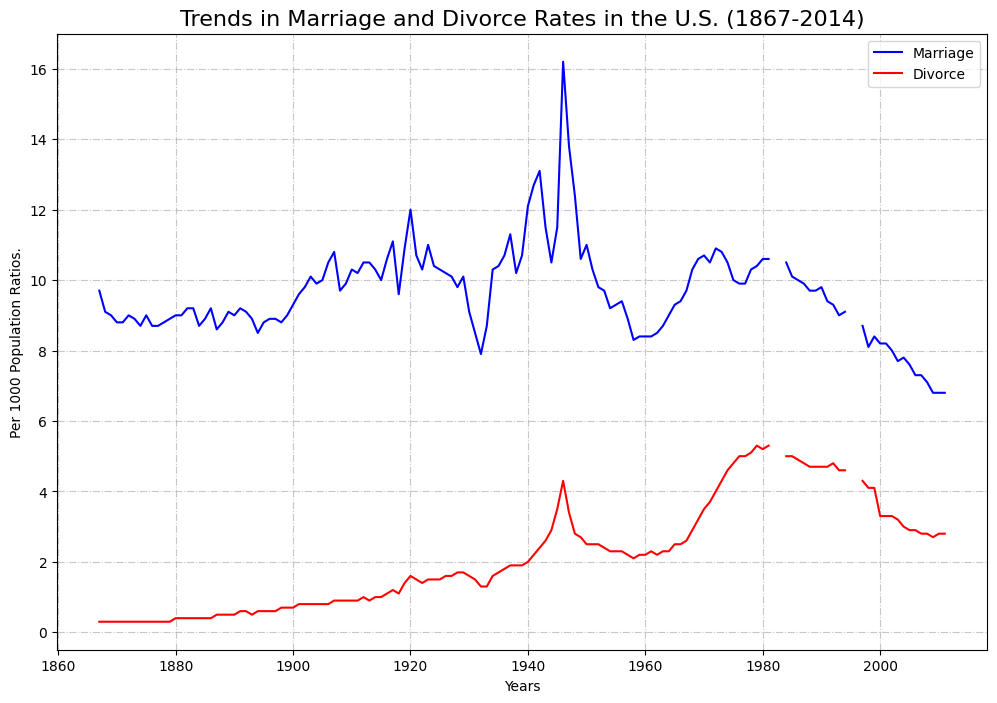

In [64]:

import matplotlib.pyplot as plt
import pandas as pd

data_df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = data_df['Year']
marriage_rates = data_df['Marriages_per_1000']
divorce_rates = data_df['Divorces_per_1000']

plt.figure(figsize=(12, 8))
plt.plot(years, marriage_rates, label='Marriage', color='blue')
plt.plot(years, divorce_rates, label='Divorce', color='red')

plt.xlabel('Years')
plt.ylabel('Per 1000 Population Ratios.')
plt.title('Trends in Marriage and Divorce Rates in the U.S. (1867-2014)', fontsize=16)
plt.legend()

plt.grid(True, linestyle='-.', alpha=0.7)


# Question 7

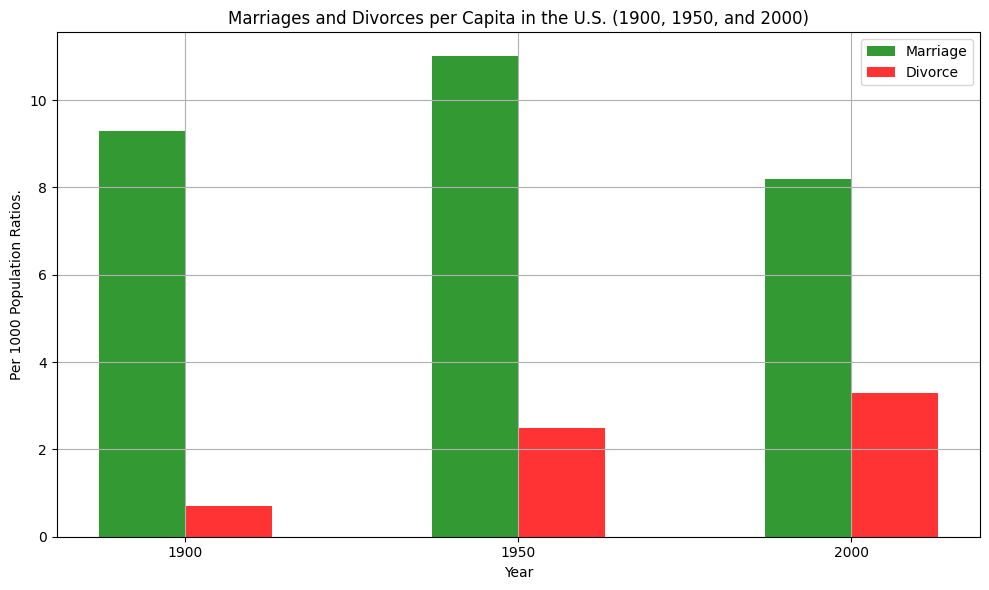

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

selected_years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(selected_years)]

years = filtered_data['Year']
marriages_per_1000 = filtered_data['Marriages_per_1000']
divorces_per_1000 = filtered_data['Divorces_per_1000']

plt.figure(figsize=(10, 6))
bar_width = 13  # Adjust the bar width to make it thicker
plt.bar(years - bar_width/2, marriages_per_1000, width=bar_width, label='Marriage', color='green', alpha=0.8)
plt.bar(years + bar_width/2, divorces_per_1000, width=bar_width, label='Divorce', color='red', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Per 1000 Population Ratios.')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)')
plt.legend()

plt.xticks(years)


plt.grid(True)
plt.tight_layout()
plt.show()


# Question 8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


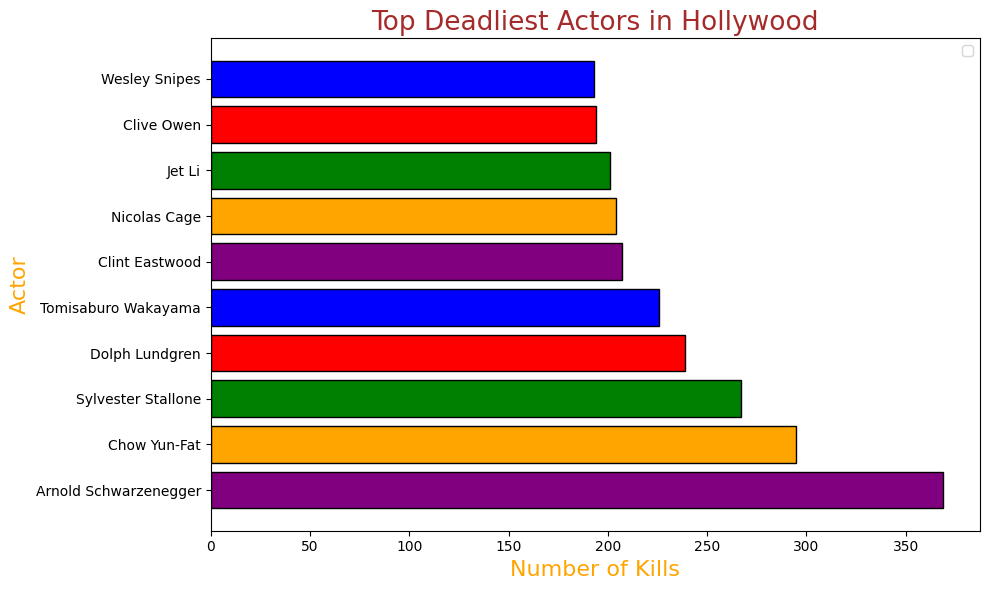

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

actors_data = pd.read_csv('actor_kill_counts.csv')

actors_data.head()

sorted_actors_data = actors_data.sort_values('Count', ascending=False)

top_actors = sorted_actors_data.head(10)

actor_names = top_actors['Actor']
kill_counts = top_actors['Count']

plt.figure(figsize=(10, 6))
bar_colors = ['purple', 'orange', 'green', 'red', 'blue']
edge_color = 'black'

plt.barh(actor_names, kill_counts, color=bar_colors, edgecolor=edge_color)

plt.xlabel('Number of Kills', color='orange', fontsize=16)
plt.ylabel('Actor', color='orange', fontsize=16)
plt.title('Top Deadliest Actors in Hollywood', color='brown', fontsize=19)
plt.legend()
plt.tight_layout()

plt.show()


# Question 9

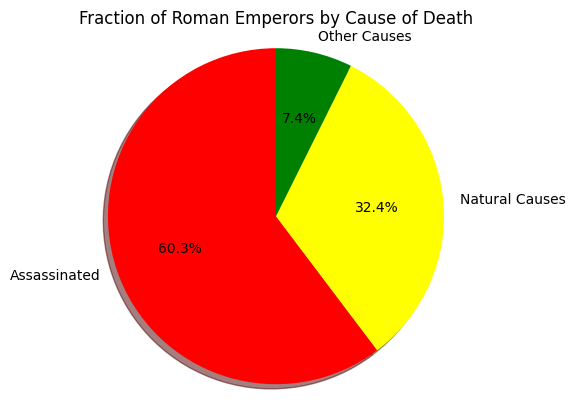

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('roman-emperor-reigns.csv')


# Determine the count of emperors affected by different causes of death
assassinated_count = data[data['Cause_of_Death'].apply(lambda x: any(keyword in x.lower() for keyword in ['assassinated', 'executed', 'perished in combat']))].shape[0]
natural_causes_count = data[data['Cause_of_Death'].apply(lambda x: any(keyword in x.lower() for keyword in ['natural causes', 'passed away in custody', 'end of life by choice']))].shape[0]
other_causes_count = data.shape[0] - (assassinated_count + natural_causes_count)


# Create a pie chart
labels = ['Assassinated', 'Natural Causes', 'Other Causes']
sizes = [assassinated, natural_causes, other_causes]
colors = ['red', 'yellow', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 

plt.title('Fraction of Roman Emperors by Cause of Death')
plt.show()


# Question 10

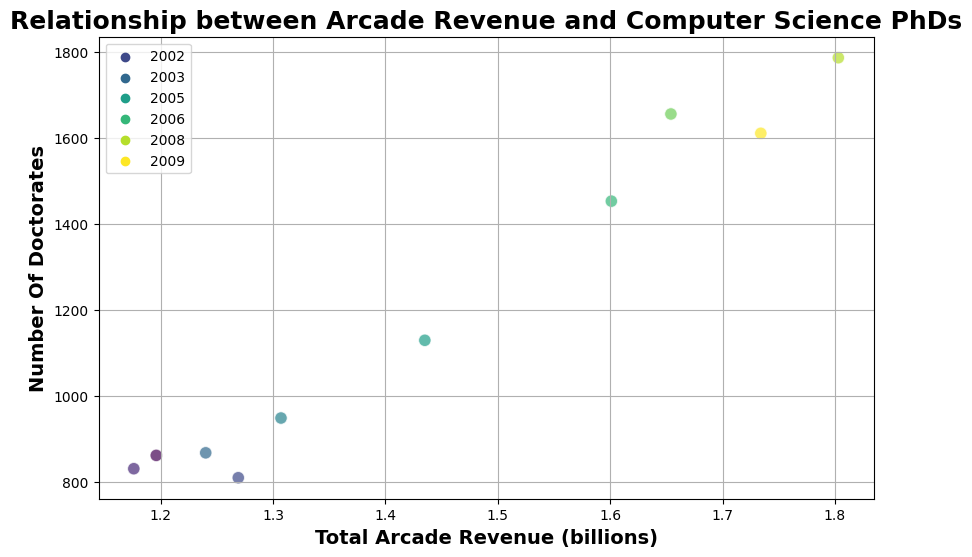

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year',
    data=data, palette="viridis", s=80, alpha=0.7
)

ax = scatterplot.axes

handles, labels = scatterplot.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='Year')
scatterplot.legend_.set_title('')  

plt.title("Relationship between Arcade Revenue and Computer Science PhDs", fontsize=18, fontweight='bold')
plt.xlabel("Total Arcade Revenue (billions)", fontsize=14, fontweight='bold')
plt.ylabel("Number Of Doctorates", fontsize=14, fontweight='bold')
plt.grid(True)

plt.show()
